# **Prueba Científico de Datos**

**José Max Barrios:**
*Data Scientist*

##**PUNTO 7**
Utilizando el conjunto de datos proporcionado en la carpeta comprimida ZIP realice unnotebook en Python o R donde haga un resumen que contenga la siguiente información:

a.Análisis descriptivo de las variables manner_of_death y armed utilizandocaracterísticas sociodemográficas (age, gender, race, etc)

b.Evolución en el tiempo de las muertes por estado (Seleccione los 5 estados con másmuertes para facilitar la visualización)

c.Realice un análisis del ingreso, escolaridad, raza y pobreza para cada uno de los 5estados

In [1901]:
# Mineria de Datos
import pandas as pd
import numpy as np

# Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier ,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import imblearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#Otros
import warnings
warnings.filterwarnings('ignore')

In [1902]:
#  Lectura de datos
educacion_ciudades = pd.read_csv('/content/EducacionCiudades.csv',encoding='windows-1252')
ingreso_ciudades = pd.read_csv('/content/IngresoCiudades.csv',encoding='windows-1252')
pobreza_ciudades = pd.read_csv('/content/PobrezaCiudades.csv',encoding='windows-1252')
policia_asesinatos = pd.read_csv('/content/PoliciaAsesinatos.csv',encoding='windows-1252')
raza_ciudades = pd.read_csv('/content/RazaCiudades.csv',encoding='windows-1252')

## **7.1** Inspeccionar Datos

In [1903]:
def data_inspec(dataframe):
    # Inspeccionar datos
    print(dataframe.head(2))
    print(dataframe.tail(2))

    print(dataframe.info())
    print()
    print(dataframe.describe())
    print()
    print('COLUMNAS')
    counter = 1
    for i in dataframe.columns:
      print(counter,i)
      counter += 1

In [1904]:
# DATAFRAME 1
data_inspec(dataframe=educacion_ciudades)

  Geographic Area            City percent_completed_hs
0              AL      Abanda CDP                 21.2
1              AL  Abbeville city                 69.1
      Geographic Area           City percent_completed_hs
29327              WY     Yoder town                 79.4
29328              WY  Y-O Ranch CDP                  100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB
None

       Geographic Area           City percent_completed_hs
count            29329          29329                29329
unique              51          24255                  728
top                 PA  Franklin city                  100
freq              1

**No** contiene valores nulos

In [1905]:
# DATAFRAME 2
data_inspec(dataframe=ingreso_ciudades)

  Geographic Area            City Median Income
0              AL      Abanda CDP         11207
1              AL  Abbeville city         25615
      Geographic Area           City Median Income
29320              WY     Yoder town         37500
29321              WY  Y-O Ranch CDP           NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB
None

       Geographic Area           City Median Income
count            29322          29322         29271
unique              51          24249         14592
top                 PA  Franklin city           (X)
freq              1762             16          1113

COLUMNAS
1 Geographic Area
2 City
3 Median Income


Median Income **Tiene** valores nulos

In [1906]:
# DATAFRAME 3
data_inspec(dataframe=pobreza_ciudades)

  Geographic Area            City poverty_rate
0              AL      Abanda CDP         78.8
1              AL  Abbeville city         29.1
      Geographic Area           City poverty_rate
29327              WY     Yoder town          5.4
29328              WY  Y-O Ranch CDP            0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB
None

       Geographic Area           City poverty_rate
count            29329          29329        29329
unique              51          24255          771
top                 PA  Franklin city            0
freq              1762             16         1464

COLUMNAS
1 Geographic Area
2 City
3 poverty_rate


**No contiene valores nulos**

In [1907]:
# DATAFRAME 4 
data_inspec(dataframe=policia_asesinatos)

   id              name      date manner_of_death armed   age gender race  \
0   3        Tim Elliot  02/01/15            shot   gun  53.0      M    A   
1   4  Lewis Lee Lembke  02/01/15            shot   gun  47.0      M    W   

      city state  signs_of_mental_illness threat_level         flee  \
0  Shelton    WA                     True       attack  Not fleeing   
1    Aloha    OR                    False       attack  Not fleeing   

   body_camera  
0        False  
1        False  
        id           name      date manner_of_death    armed   age gender  \
2533  2817  Isaiah Tucker  31/07/17            shot  vehicle  28.0      M   
2534  2815   Dwayne Jeune  31/07/17            shot    knife  32.0      M   

     race      city state  signs_of_mental_illness threat_level         flee  \
2533    B   Oshkosh    WI                    False       attack          Car   
2534    B  Brooklyn    NY                     True       attack  Not fleeing   

      body_camera  
2533      

In [1908]:
# DATAFRAME 5 
data_inspec(dataframe=raza_ciudades)

  Geographic area            City share_white share_black  \
0              AL      Abanda CDP        67.2        30.2   
1              AL  Abbeville city        54.4        41.4   

  share_native_american share_asian share_hispanic  
0                     0           0            1.6  
1                   0.1           1            3.1  
      Geographic area           City share_white share_black  \
29266              WY     Yoder town        97.4           0   
29267              WY  Y-O Ranch CDP        92.8         1.5   

      share_native_american share_asian share_hispanic  
29266                     0           0              4  
29267                   2.6           0           11.8  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   2926

In [1909]:
#  Filas que contienen null
ingreso_ciudades[ingreso_ciudades.isna().any(axis=1)]

,Geographic Area,City,Median Income
29119,WY,Albany CDP,NaN
29121,WY,Alcova CDP,NaN
29123,WY,Alpine Northeast CDP,NaN
29126,WY,Antelope Hills CDP,NaN
29129,WY,Arlington CDP,NaN
29130,WY,Arrowhead Springs CDP,NaN
29132,WY,Atlantic City CDP,NaN
29133,WY,Auburn CDP,NaN
29139,WY,Bedford CDP,NaN
29140,WY,Bessemer Bend CDP,NaN


In [1910]:
#  Filas que contienen null
policia_asesinatos[policia_asesinatos.isna().any(axis=1)]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
59,110,William Campbell,25/01/15,shot,gun,59.0,M,NaN,Winslow,NJ,False,attack,Not fleeing,False
124,584,Alejandro Salazar,20/02/15,shot,gun,NaN,M,H,Houston,TX,False,attack,Car,False
241,244,John Marcell Allen,30/03/15,shot,gun,54.0,M,NaN,Boulder City,NV,False,attack,Not fleeing,False
266,534,Mark Smith,09/04/15,shot and Tasered,vehicle,54.0,M,NaN,Kellyville,OK,False,attack,Other,False
340,433,Joseph Roy,07/05/15,shot,knife,72.0,M,NaN,Lawrenceville,GA,True,other,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,2812,Alejandro Alvarado,27/07/17,shot,knife,NaN,M,H,Chowchilla,CA,False,attack,Not fleeing,False
2529,2819,Brian J. Skinner,28/07/17,shot,knife,32.0,M,NaN,Glenville,NY,True,other,Not fleeing,False
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False


In [1911]:
# Comparando el estado que hace falta
count_one =pd.DataFrame(educacion_ciudades['Geographic Area'].value_counts())
count_one.columns = ['conteo_educacion']
count_two = ingreso_ciudades['Geographic Area'].value_counts()
count_two.columns = ['conteo_ingreso']
count_three = pd.DataFrame(pobreza_ciudades['Geographic Area'].value_counts())
count_three.columns = ['conteo_pobreza']
count_four = pd.DataFrame(raza_ciudades['Geographic area'].value_counts())
count_four.columns = ['conteo_raza']
# Right Join de Conteo por Estado o área geografica
geographic_count = count_one.join([count_two, count_three, count_four])

In [1912]:
# Conteo por Estado
geographic_count

,conteo_educacion,Geographic Area,conteo_pobreza,conteo_raza
PA,1762,1762,1762,1764
TX,1747,1747,1747,1752
CA,1522,1522,1522,1523
IL,1368,1368,1368,1367
OH,1215,1215,1215,1204
NY,1196,1196,1196,1189
MO,1033,1033,1033,1032
IA,1008,1008,1008,1009
FL,918,918,918,920
MN,903,903,903,906


In [1913]:
#  Cantidad de Filas
print('1. Educación Ciudades:',len(educacion_ciudades.index))
print('2. Ingreso Ciudades:',len(ingreso_ciudades.index)) 
print('3. Pobreza ciudades:',len(pobreza_ciudades.index)) 
print('4. Policias Asesinados:',len(policia_asesinatos.index))
print('5. Raza Ciudades:',len(raza_ciudades.index))

1. Educación Ciudades: 29329
2. Ingreso Ciudades: 29322
3. Pobreza ciudades: 29329
4. Policias Asesinados: 2535
5. Raza Ciudades: 29268


In [1914]:
#  Valores Nulos
print('1. Valores Nulos Educación Ciudades: ',educacion_ciudades.isnull().values.sum())
print('2. Valores Nulos Ingreso Ciudades:',ingreso_ciudades.isnull().values.sum()) 
print('3. Valores Nulos Pobreza ciudades:',pobreza_ciudades.isnull().values.sum()) 
print('4. Valores Nulos Policias Asesinados:',policia_asesinatos.isnull().values.sum())
print('5. Valores Nulos Raza Ciudades:',raza_ciudades.isnull().values.sum())

1. Valores Nulos Educación Ciudades:  0
2. Valores Nulos Ingreso Ciudades: 51
3. Valores Nulos Pobreza ciudades: 0
4. Valores Nulos Policias Asesinados: 346
5. Valores Nulos Raza Ciudades: 0


## **7.2** Minería de datos y Data Marts

In [1915]:
# Remplazamos El promedio de Ingreso de Las ciudades que falten por el promedio de ingreso de todos los estados
ingreso_ciudades['Median Income'] = pd.to_numeric(ingreso_ciudades['Median Income'],errors='coerce')
ingreso_ciudades['Median Income'] = ingreso_ciudades['Median Income'].fillna(ingreso_ciudades['Median Income'].mean())

In [1916]:
#  Cantidad de Filas
print('1. Educación Ciudades:',len(educacion_ciudades.index))
print('2. Ingreso Ciudades:',len(ingreso_ciudades.index)) 
print('3. Pobreza ciudades:',len(pobreza_ciudades.index)) 
print('4. Policias Asesinados:',len(policia_asesinatos.index))
print('5. Raza Ciudades:',len(raza_ciudades.index))

1. Educación Ciudades: 29329
2. Ingreso Ciudades: 29322
3. Pobreza ciudades: 29329
4. Policias Asesinados: 2535
5. Raza Ciudades: 29268


In [1917]:
# Eliminar los valores nulos de las muertes de policias
# Remplazamos valores nulos de edad de los policias por el promedio
policia_asesinatos['age'] = pd.to_numeric(policia_asesinatos['age'],errors='coerce')
policia_asesinatos['age'] = policia_asesinatos['age'].fillna(policia_asesinatos['age'].mean())

In [1918]:
# Cambiemos los valores null de armed por undetermined ya que no se pudo determinar
policia_asesinatos['armed'] = policia_asesinatos['armed'].fillna('undetermined')

In [1919]:
# Cambiemos los valores null de raza por undetermined ya que no se pudo determinar
policia_asesinatos['race'] = policia_asesinatos['race'].fillna('undetermined')

In [1920]:
# Cambiemos los valores null de si huyo por undetermined ya que no se pudo determinar
policia_asesinatos['flee'] = policia_asesinatos['flee'].fillna('undetermined')

In [1921]:
#  Valores Nulos
print('1. Valores Nulos Educación Ciudades: ',educacion_ciudades.isnull().values.sum())
print('2. Valores Nulos Ingreso Ciudades:',ingreso_ciudades.isnull().values.sum()) 
print('3. Valores Nulos Pobreza ciudades:',pobreza_ciudades.isnull().values.sum()) 
print('4. Valores Nulos Policias Asesinados:',policia_asesinatos.isnull().values.sum())
print('5. Valores Nulos Raza Ciudades:',raza_ciudades.isnull().values.sum())

1. Valores Nulos Educación Ciudades:  0
2. Valores Nulos Ingreso Ciudades: 0
3. Valores Nulos Pobreza ciudades: 0
4. Valores Nulos Policias Asesinados: 0
5. Valores Nulos Raza Ciudades: 0


In [1922]:
# Transformar Raza
def race_transformation(race):
  if race == 'A':
    return 'ASIAN'
  elif race == 'W':
    return 'WHITE'
  elif race =='B':
    return 'BLACK'
  elif race == 'N':
    return 'OTRO'
  elif race == 'undetermined':
    return 'undetermined'
  elif race == 'O':
    return 'NATIVE'
  elif race == 'H':
    return 'HISPANIC'

In [1923]:
# Transformando razas
policia_asesinatos['race'] = policia_asesinatos['race'].apply(race_transformation)

# volviendo el porcentaje completad a flotante
educacion_ciudades['percent_completed_hs'] = pd.to_numeric(educacion_ciudades['percent_completed_hs'], errors='coerce')

# volviendo el porcentaje pobreza a flotante
pobreza_ciudades['povery_rate'] = pd.to_numeric(pobreza_ciudades['poverty_rate'], errors='coerce')

# Volviendo el procentaje de compartir para todas las razas flotantes.
raza_ciudades['share_white'] = pd.to_numeric(raza_ciudades['share_white'], errors='coerce')
raza_ciudades['share_black'] = pd.to_numeric(raza_ciudades['share_black'], errors='coerce')
raza_ciudades['share_native_american'] = pd.to_numeric(raza_ciudades['share_native_american'], errors='coerce')
raza_ciudades['share_asian'] = pd.to_numeric(raza_ciudades['share_asian'], errors='coerce')
raza_ciudades['share_hispanic'] = pd.to_numeric(raza_ciudades['share_hispanic'], errors='coerce')

In [1924]:
# Agrupando por estado y promedio
educacion_agrupada = educacion_ciudades.copy()
educacion_agrupada = educacion_agrupada.drop(columns=['City'])
educacion_agrupada = educacion_agrupada.groupby('Geographic Area').mean()
educacion_agrupada.reset_index(inplace=True)
educacion_agrupada.columns = ['state','hs_mean']
educacion_agrupada = educacion_agrupada.sort_values('hs_mean',ascending=False)

# Columna de control
policia_asesinatos['conteo'] = 1

In [1925]:
# Agrupando por estado y promedio de pobreza
raza_agrupada = raza_ciudades.copy()
raza_agrupada = raza_agrupada.drop(columns=['City'])
raza_agrupada = raza_agrupada.groupby('Geographic area').mean()
raza_agrupada.reset_index(inplace=True)
raza_agrupada.columns = ['state','white','black','native','asian','hispanic']
raza_agrupada = raza_agrupada.sort_values('white',ascending=False)

In [1926]:
# Agrupando por estado e ingresos
ingreso_agrupada = ingreso_ciudades.copy()
ingreso_agrupada = ingreso_agrupada.drop(columns=['City'])
ingreso_agrupada = ingreso_agrupada.groupby('Geographic Area').mean()
ingreso_agrupada.reset_index(inplace=True)
ingreso_agrupada.columns = ['state','median_income']
ingreso_agrupada = ingreso_agrupada.sort_values('median_income',ascending=False)

In [1927]:
# Top 5 Estados con mas homicidos
top_cinco = policia_asesinatos['state'].value_counts()
top_cinco = pd.DataFrame(top_cinco)
top_cinco.reset_index(inplace=True)
top_cinco.columns = ['state','conteo']
top_cinco = top_cinco.iloc[0:5,]

In [1928]:
# SELECCION DE MUERTES POR ESTADO
ca = policia_asesinatos[policia_asesinatos['state']=='CA']
tx = policia_asesinatos[policia_asesinatos['state']=='TX']
fl = policia_asesinatos[policia_asesinatos['state']=='FL']
az = policia_asesinatos[policia_asesinatos['state']=='AZ']
oh = policia_asesinatos[policia_asesinatos['state']=='OH']

In [1929]:
# Evolucion de Homicidio por Estado
tx['date']= pd.to_datetime(tx['date'])
tx = tx.sort_values(by="date")
tx_grouped = tx.copy()
tx_grouped = tx[['date','conteo']]
tx_grouped['acumulado'] = tx_grouped['conteo'].cumsum()

# Evolucion de Homicidio por Estado
fl['date']= pd.to_datetime(fl['date'])
fl = fl.sort_values(by="date")
fl_grouped = fl.copy()
fl_grouped = fl[['date','conteo']]
fl_grouped['acumulado'] = fl_grouped['conteo'].cumsum()

# Evolucion de Homicidio por Estado
az['date']= pd.to_datetime(az['date'])
az = az.sort_values(by="date")
az_grouped = az.copy()
az_grouped = az[['date','conteo']]
az_grouped['acumulado'] = az_grouped['conteo'].cumsum()

# Evolucion de Homicidio por Estado
oh['date']= pd.to_datetime(oh['date'])
oh = oh.sort_values(by="date")
oh_grouped = oh.copy()
oh_grouped = oh[['date','conteo']]
oh_grouped['acumulado'] = oh_grouped['conteo'].cumsum()

# Evolucion de Homicidio por Estado
ca['date']= pd.to_datetime(ca['date'])
ca = ca.sort_values(by="date")
ca_grouped = ca.copy()
ca_grouped = ca[['date','conteo']]
ca_grouped['acumulado'] = ca_grouped['conteo'].cumsum()


# **Punto A.** 
Análisis descriptivo de las variables **manner_of_death** y **armed** utilizandocaracterísticas sociodemográficas (**age**, **gender**, **race**, etc).

Variables sociodemográficas:

¿Qué características sociodemográficas?
Características sociodemográficas: Son el conjunto de características biológicas, socioeconomicoculturales que están presentes en la población sujeta a estudio, tomando aquellas que puedan ser medibles. modalidad en los diversos medios donde se desenvuelva el sujeto.

referencias: https://sisbib.unmsm.edu.pe/bibvirtualdata/tesis/salud/Rabines_J_A/CAP%C3%8DTULO1-introduccion.pdf

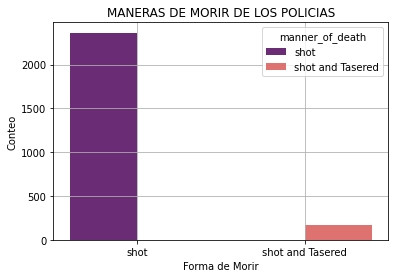

In [1930]:
# Conteo de Formas de Morir
sns.countplot(data=policia_asesinatos, x='manner_of_death', hue='manner_of_death',palette='magma')
plt.title('MANERAS DE MORIR DE LOS POLICIAS')
plt.xlabel('Forma de Morir')
plt.ylabel('Conteo')
plt.grid()
plt.show()

### **A.1:** Manner of Death

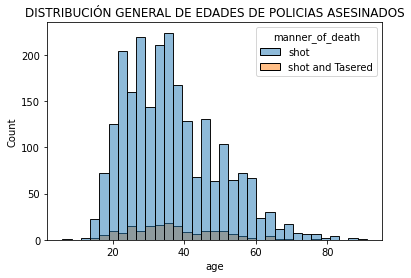

In [1931]:
# Distribución de edades de policias muertos
sns.histplot(data=policia_asesinatos, x='age', hue='manner_of_death')
plt.title('DISTRIBUCIÓN GENERAL DE EDADES DE POLICIAS ASESINADOS')
plt.show()

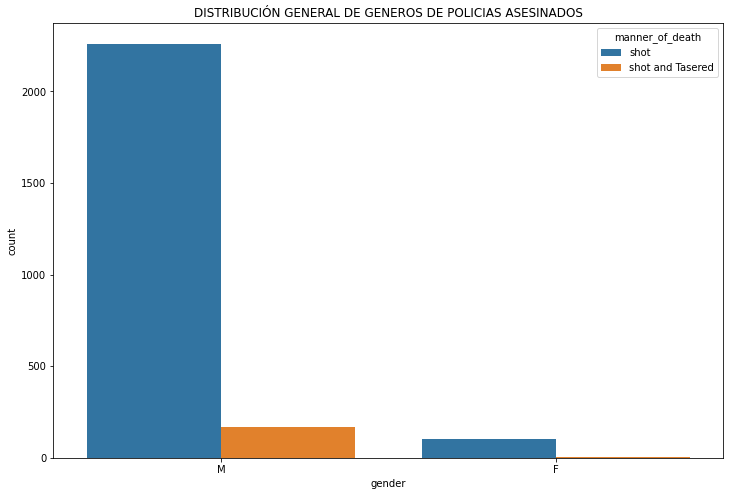

In [1932]:
# Distribución de generos de policias muertos
plt.figure(figsize=(12,8))
sns.countplot(data=policia_asesinatos, x='gender', hue='manner_of_death')
plt.title('DISTRIBUCIÓN GENERAL DE GENEROS DE POLICIAS ASESINADOS')
plt.show()

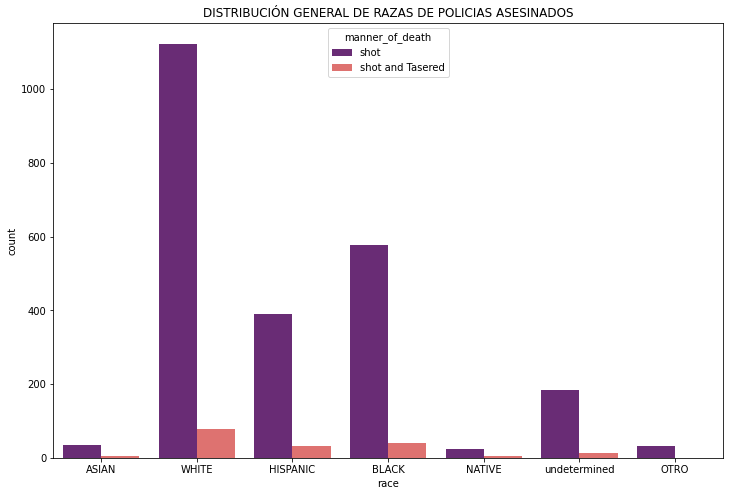

In [1933]:
# Distribución de edades de policias muertos
plt.figure(figsize=(12,8))
sns.countplot(data=policia_asesinatos, x='race', hue='manner_of_death',palette='magma')
plt.title('DISTRIBUCIÓN GENERAL DE RAZAS DE POLICIAS ASESINADOS')
plt.show()

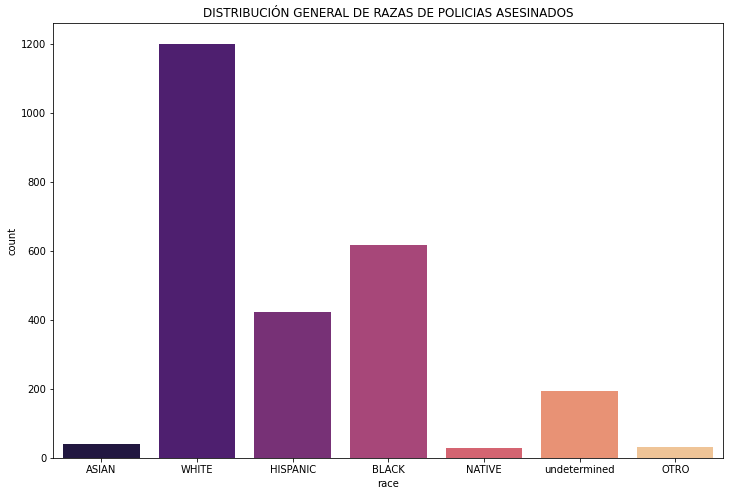

In [1934]:
# Distribución de edades de policias muertos
plt.figure(figsize=(12,8))
sns.countplot(data=policia_asesinatos, x='race',palette='magma')
plt.title('DISTRIBUCIÓN GENERAL DE RAZAS DE POLICIAS ASESINADOS')
plt.show()

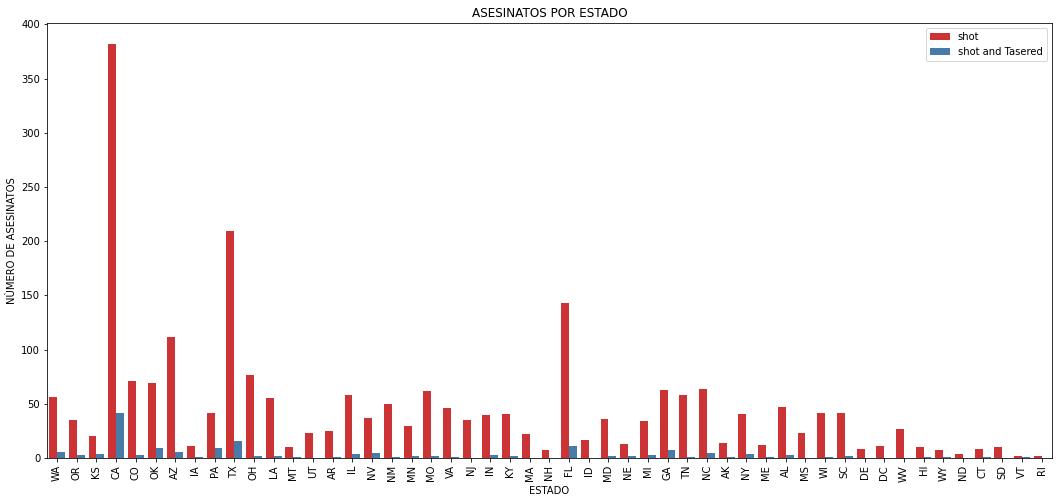

In [1935]:
# Distribución de edades de policias muertos
plt.figure(figsize=(18,8))
sns.countplot(data=policia_asesinatos, x='state', hue='manner_of_death',palette='Set1')
plt.title('ASESINATOS POR ESTADO')
plt.xlabel('ESTADO')
plt.ylabel('NÙMERO DE ASESINATOS')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

Los estados donde más ocurren homicidios de policias fueron:

1. California
2. Texas
3. Florida
4. Arizona
5. Ohio

### **A.2:** Armed

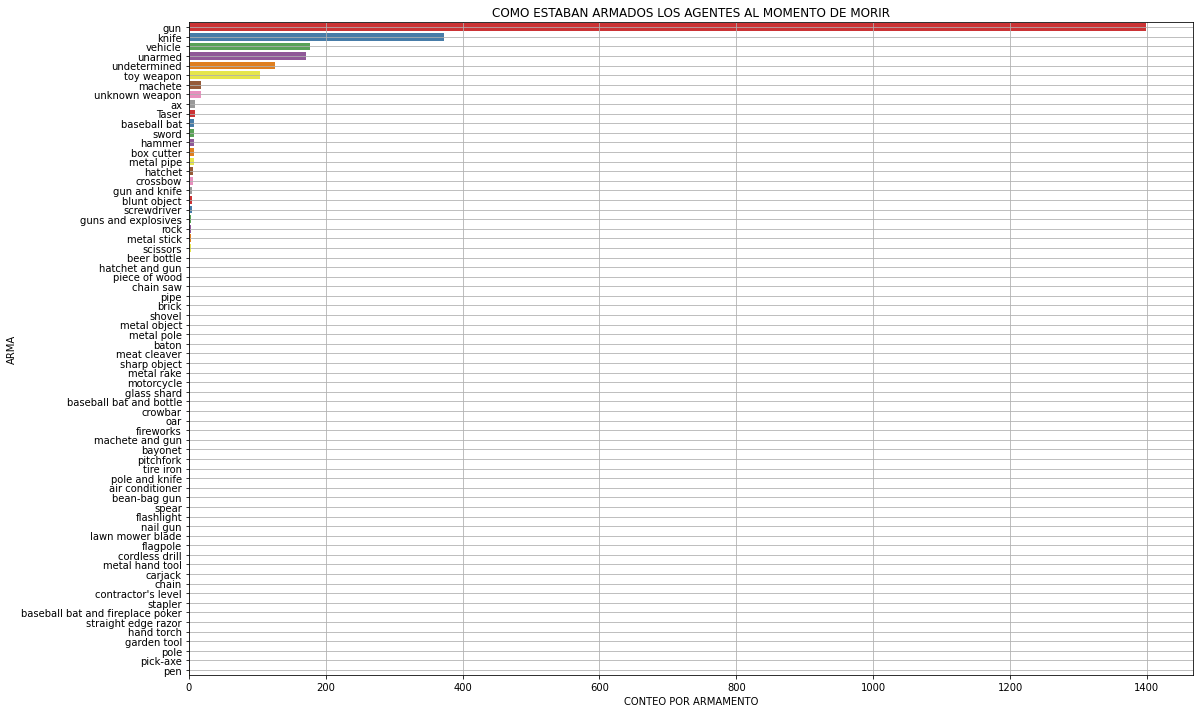

In [1936]:
# Conteo de Formas de Morir
plt.figure(figsize=(18,12))
sns.countplot(data=policia_asesinatos, y='armed',palette='Set1',order= policia_asesinatos['armed'].value_counts().index)
plt.title('COMO ESTABAN ARMADOS LOS AGENTES AL MOMENTO DE MORIR')
plt.xlabel('CONTEO POR ARMAMENTO')
plt.ylabel('ARMA')
plt.grid()
plt.show()

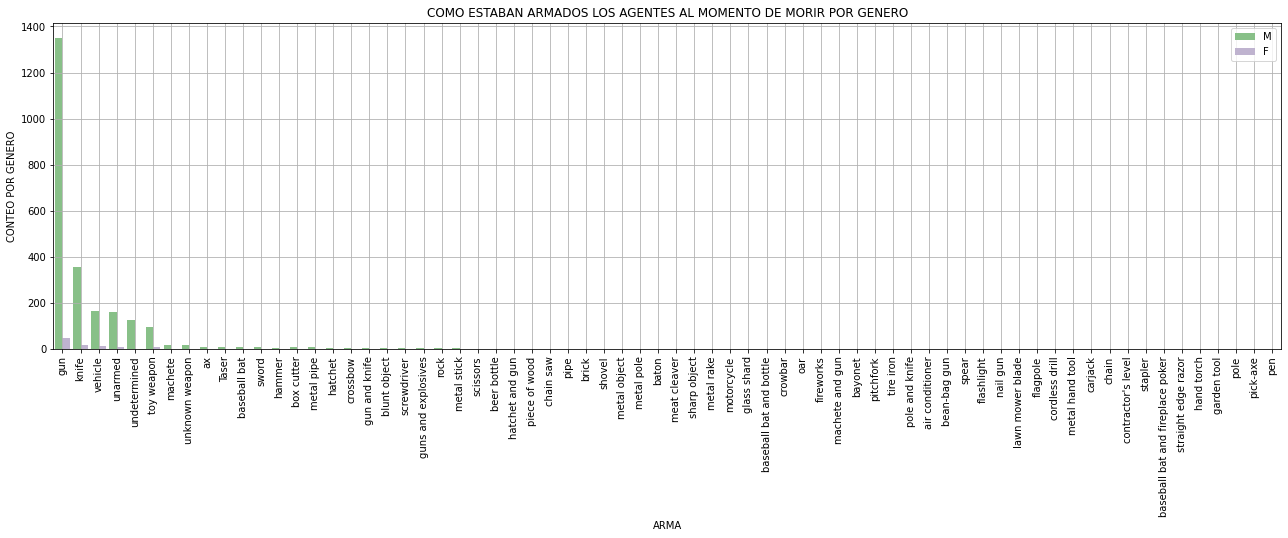

In [1937]:
# Conteo de Formas de Morir
plt.figure(figsize=(22,6))
sns.countplot(data=policia_asesinatos, x='armed',palette='Accent',order= policia_asesinatos['armed'].value_counts().index, hue='gender')
plt.title('COMO ESTABAN ARMADOS LOS AGENTES AL MOMENTO DE MORIR POR GENERO')
plt.xlabel('ARMA')
plt.ylabel('CONTEO POR GENERO')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.grid()
plt.show()

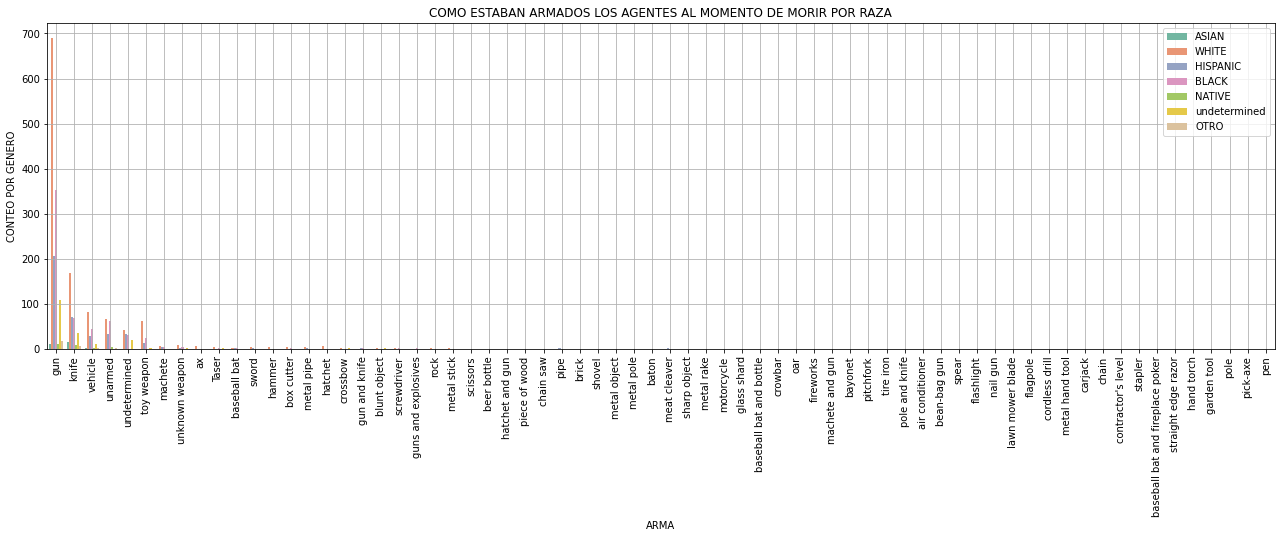

In [1938]:
# Conteo de Formas de Morir
plt.figure(figsize=(22,6))
sns.countplot(data=policia_asesinatos, x='armed',palette='Set2',order= policia_asesinatos['armed'].value_counts().index, hue='race')
plt.title('COMO ESTABAN ARMADOS LOS AGENTES AL MOMENTO DE MORIR POR RAZA')
plt.xlabel('ARMA')
plt.ylabel('CONTEO POR GENERO')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.grid()
plt.show()

# **Punto B.** 
Evolución en el tiempo de las muertes por estado (Seleccione los 5 estados con másmuertes para facilitar la visualización).

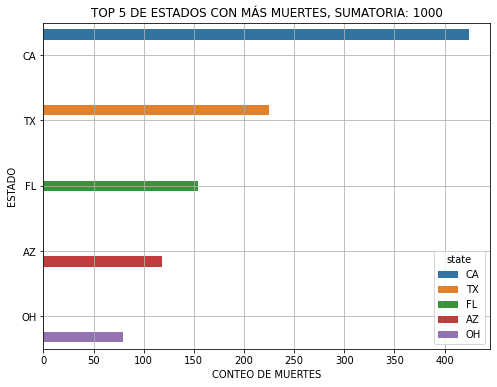

In [1939]:
# conteo de muertes
total_muertes = sum(top_cinco['conteo'])
plt.figure(figsize=(8,6))
sns.barplot(data=top_cinco, y='state',x='conteo', hue='state')
plt.title(f'TOP 5 DE ESTADOS CON MÁS MUERTES, SUMATORIA: {total_muertes}')
plt.ylabel('ESTADO')
plt.xlabel('CONTEO DE MUERTES')
plt.grid()
plt.show()

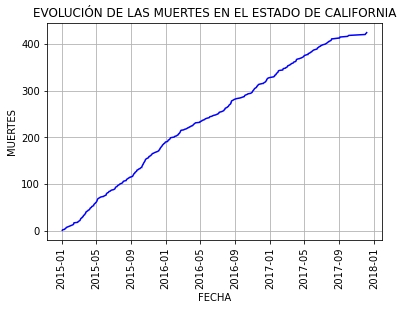

In [1940]:
# Acumulado de muertes  CALIFORNIA
sns.lineplot(data=ca_grouped, x='date',y='acumulado', color='blue')
plt.title('EVOLUCIÓN DE LAS MUERTES EN EL ESTADO DE CALIFORNIA')
plt.ylabel('MUERTES')
plt.xlabel('FECHA')
plt.grid()
plt.xticks(rotation=90)
plt.show()

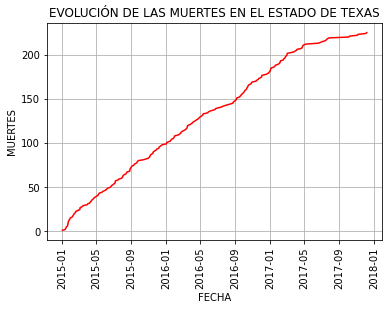

In [1941]:
# Acumulado de muertes  TEXAS
sns.lineplot(data=tx_grouped, x='date',y='acumulado', color='red')
plt.title('EVOLUCIÓN DE LAS MUERTES EN EL ESTADO DE TEXAS')
plt.ylabel('MUERTES')
plt.xlabel('FECHA')
plt.grid()
plt.xticks(rotation=90)
plt.show()

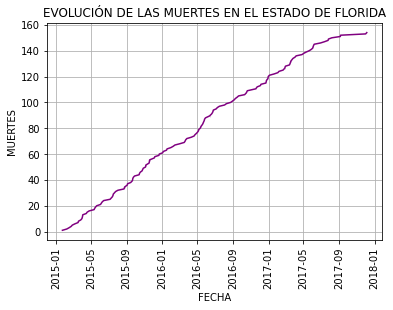

In [1942]:
# Acumulado de muertes  FLORIDA
sns.lineplot(data=fl_grouped, x='date',y='acumulado', color='purple')
plt.title('EVOLUCIÓN DE LAS MUERTES EN EL ESTADO DE FLORIDA')
plt.ylabel('MUERTES')
plt.xlabel('FECHA')
plt.grid()
plt.xticks(rotation=90)
plt.show()

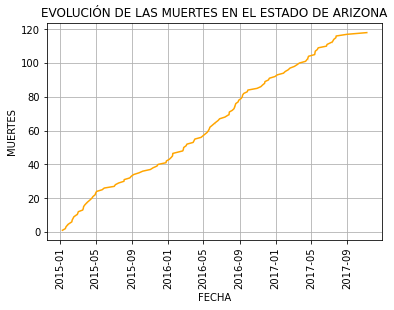

In [1943]:
# Acumulado de muertes  ARIZONA
sns.lineplot(data=az_grouped, x='date',y='acumulado', color='orange')
plt.title('EVOLUCIÓN DE LAS MUERTES EN EL ESTADO DE ARIZONA')
plt.ylabel('MUERTES')
plt.xlabel('FECHA')
plt.grid()
plt.xticks(rotation=90)
plt.show()

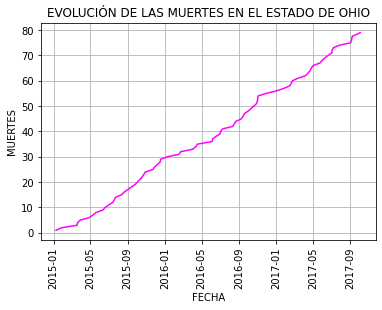

In [1944]:
# Acumulado de muertes  OHIO
sns.lineplot(data=oh_grouped, x='date',y='acumulado', color='magenta')
plt.title('EVOLUCIÓN DE LAS MUERTES EN EL ESTADO DE OHIO')
plt.ylabel('MUERTES')
plt.xlabel('FECHA')
plt.grid()
plt.xticks(rotation=90)
plt.show()

# **Punto C.** 
Realice un análisis del ingreso, escolaridad, raza y pobreza para cada uno de los 5estados

#### **C.1 Educación**

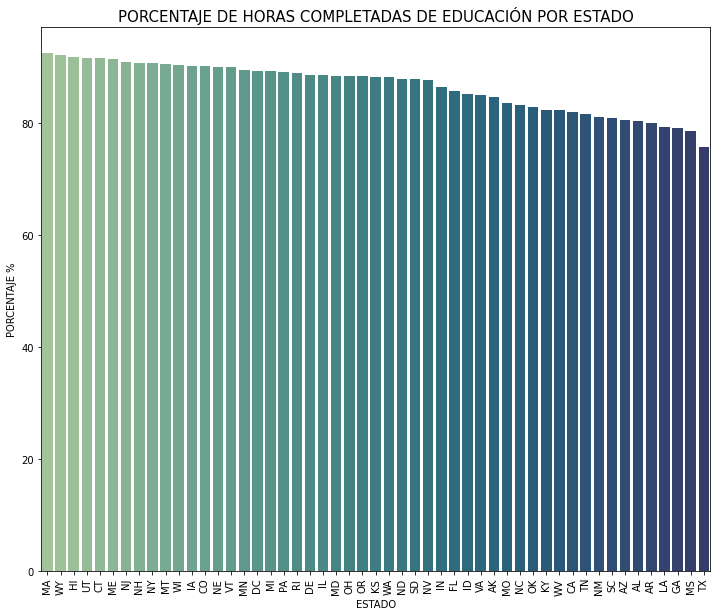

In [1945]:
# Educaciòn por Estado
plt.figure(figsize=(12,10))
sns.barplot( x='state', y='hs_mean',data=educacion_agrupada,linewidth=0.8, palette='crest')
plt.title('PORCENTAJE DE HORAS COMPLETADAS DE EDUCACIÓN POR ESTADO',size=15)
plt.ylabel('PORCENTAJE %')
plt.xlabel('ESTADO')
plt.xticks(rotation=90)
plt.show()

Los Estados de **California**, **Ariozona**,**Texas** (el último) y **Florida* se encuentran dentro de los  20 Estados que peor porcentaje de promedio Horas completadas en educación, por lo que quizas haya una correlación entre el nivel de educación y la violencia dentro de los estados. El único estado que esta dentro de los mejores 25 estados en educación sería el estado de **Ohio** (puesto 23)

#### **C.2 Pobreza**

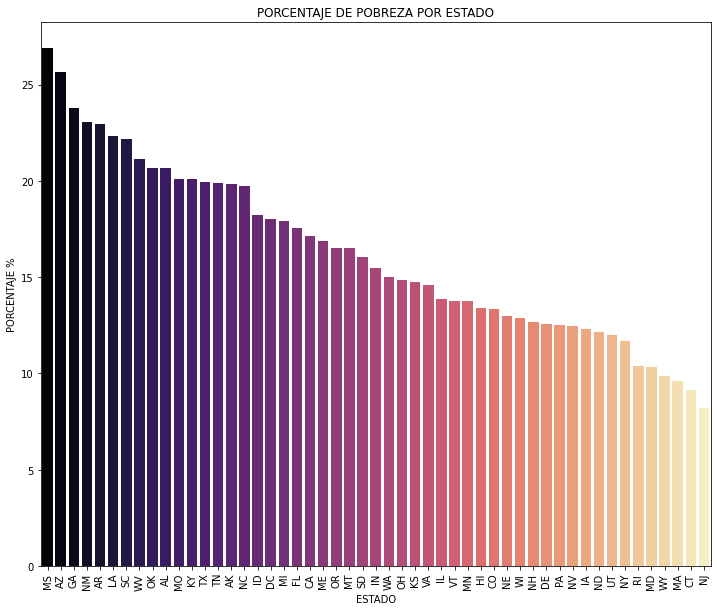

In [1946]:
# Pobreza
plt.figure(figsize=(12,10))
sns.barplot( x='state', y='poverty_rate_mean', data=pobreza_agrupada,linewidth=0.3, palette='magma')
plt.title('PORCENTAJE DE POBREZA POR ESTADO')
plt.ylabel('PORCENTAJE %')
plt.xlabel('ESTADO')
plt.xticks(rotation=90)
plt.show()

El Estado de Arizona es el **SEGUNDO ESTADO** con mayor porcentaj de de pobreza de EUA (más de 25%) lo que probablemente tenga una correlación muy alta en la cantidad de homicidios de policias.

A nivel de Pobreza los Estados con mayor número de asesinatos de policias no se encuentran dentro del top  10 de estados de los peores estados. Sin embargo el estado de Texas se encuentra en la posición 13, el estado de Florida se encuentra en el lugar 20 y el de california 21. Si lo dividimos los 51 Estados, se encuentran dentro de la mitad de estados que mayor indice de Pobreza tienen lo que quizás tenga una correlación con respecto a los asesinatos.

Nuevamente el estado de **OHIO** esta en la posición 28, por lo que es el mejor colocado en el nivel de pobreza (porcentaje más bajo de pobreza) 

#### **C.3 Raza**

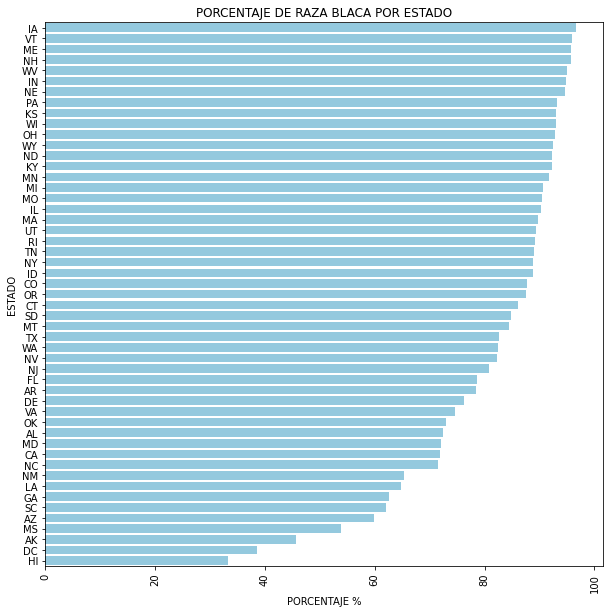

In [1947]:
# Raza por Ciudades
plt.figure(figsize=(10,10))
sns.barplot(data=raza_agrupada, y='state',x=raza_agrupada['white'], color='skyblue')
plt.title('PORCENTAJE DE RAZA BLACA POR ESTADO')
plt.xlabel('PORCENTAJE %')
plt.ylabel('ESTADO')
plt.xticks(rotation=90)
plt.show()

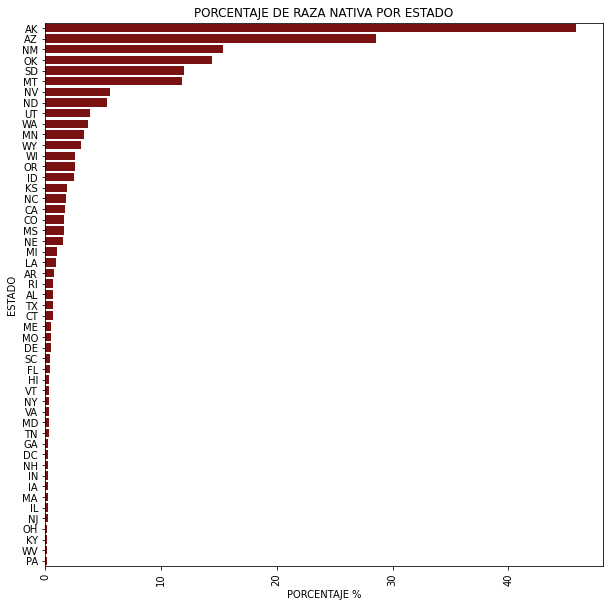

In [1948]:
# Tomamos en consideracion la que comparte raza nativa
raza_agrupada_nativa = raza_agrupada.sort_values('native',ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(data=raza_agrupada_nativa, y='state',x=raza_agrupada['native'], color='darkred')
plt.title('PORCENTAJE DE RAZA NATIVA POR ESTADO')
plt.xlabel('PORCENTAJE %')
plt.ylabel('ESTADO')
plt.xticks(rotation=90)
plt.show()

almenos 75% de la Población para los Estados de:
1. California
2. Texas
3. Florida
4. Ohio 
pertenecen a raza blanca

Por lo que por este supuesto, la mayoría de los agentes podrían ser de esta entnia, y de ahí la cantidad de muertes de esta raza es la mayor.

Sin embargo el estado de **Arizona** tiene menos de 60% de Raza Blanca.
Haciendo e análisis exploratorio se deduce que el 30% de sus habitantes pertencen a raza nativa.


#### **C.4 Ingresos**

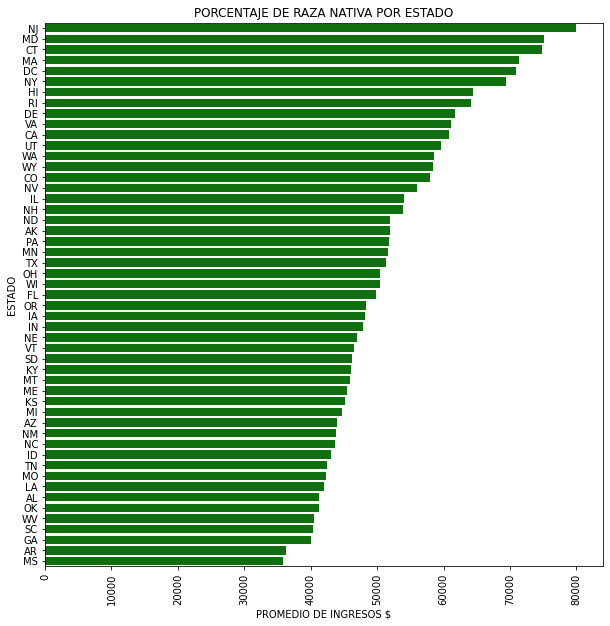

In [1949]:
# Tomamos en consideracion la que comparte raza nativa
raza_agrupada_nativa = raza_agrupada.sort_values('native',ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(data=ingreso_agrupada, y='state',x=ingreso_agrupada['median_income'], color='green')
plt.title('PORCENTAJE DE RAZA NATIVA POR ESTADO')
plt.xlabel('PROMEDIO DE INGRESOS $')
plt.ylabel('ESTADO')
plt.xticks(rotation=90)
plt.show()

Hay que decir que los siguientes estados se encuentran dentro de los 25 mejores estados:
11. California
23. Texas
24. Ohio

Florida se encuentra en la posición 26 lo que significa que es bastante aceptable esta justo en la linea divisoria

Pero el Estado de Arizona se encuentra en la posición 39, por lo que es uno de los peores estados a nivel de ingresos.

## **7.3 Conclusiones**

**Hipotesis**

**California**
Probablemente la mayor cantidad de crimenes se realicen en California ya que es uno de los estados con mayor nivel de ingresos, pero que su ves tambíen tiene algún problema de pobreza, por lo que quizás esta población se vea tentada a cometer crimenes a los que más tienen.

Estos **3** estados son Fronterizos
1. California
2. Arizona
3. Texas

Por lo cúal reciben inmigrantes de todas partes del mundo, por lo que quizás haya un poco más de situaciones policiacas que terminen en persecuciones.

La Raza parece no tener un peso especifico, simplemente que debido a la que la mayoría de la población es blanca, por este motivo hay más muerte relacionadas.

En el caso de Arizona parece tener un problema en el promedio de ingresos, es uno de los peores en el país, por lo que finalmente en algunos casos termine en casos de delincuencía.



##**PUNTO 8**

Utilizando el mismo conjunto de datos del punto 8, implemente un modelo de aprendizaje
automático que dadas ciertas variables sociodemográficas y del tipo de asesinato policiaco,
permita predecir la raza de la persona

In [1950]:
# Copiando Dataframe
datos = policia_asesinatos.copy()

# Obteniendo solo variables sociodemograficas
datos = datos[['manner_of_death', 'armed','age','gender','state','race']]

# Creando variables Dummy
datos = pd.get_dummies(datos,columns=['manner_of_death','armed','state','gender'])


In [1951]:
# Transformar Raza a numerico
def numerical_race(race):
  if race == 'ASIAN':
    return 0
  elif race == 'WHITE':
    return 1
  elif race =='BLACK':
    return 2
  elif race == 'OTRO':
    return 3
  elif race == 'undetermined':
    return 4
  elif race == 'NATIVE':
    return 5
  elif race == 'HISPANIC':
    return 6

# Transformar Raza a numerico
def back_to_race(race):
  if race == 0:
    return 'ASIAN'
  elif race == 1:
    return 'WHITE'
  elif race ==2:
    return 'BLACK'
  elif race == 3:
    return 'OTRO'
  elif race == 4:
    return 'undetermined'
  elif race == 5:
    return 'NATIVE'
  elif race == 6:
    return 'HISPANIC'

In [1952]:
# Para la importancia de atributos
datos['race'] = datos['race'].apply(numerical_race)

## **Importancia de Atributos**

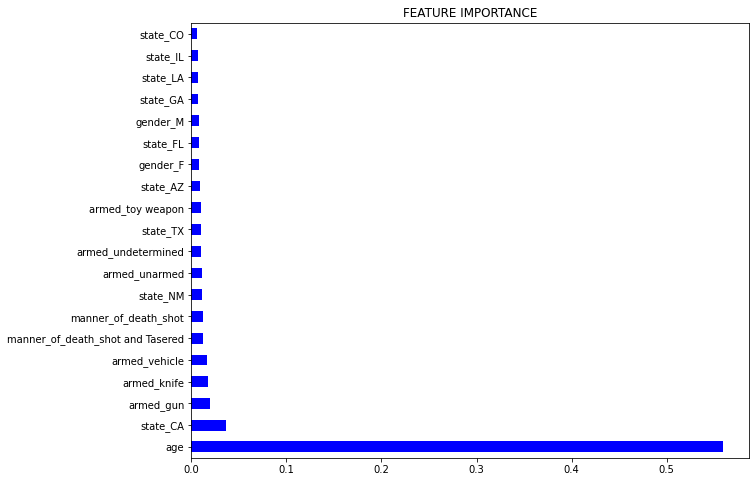

In [1953]:
#Separating Variables
X = datos.drop(columns=['race'])
y = datos['race']


model = ExtraTreesClassifier(random_state=0)
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,8))
feat_importances.nlargest(20).plot(kind='barh',color='blue')
plt.title('FEATURE IMPORTANCE')
plt.show()


Las Variables Más importantes por supuesto son
1. La edad
2. Si fue asesinado en California
3. Si portaba un arma

Esto se debe a que en su mayoría en el analísis descriptivo estas variables son la mayor cantidad de ejemplos.

In [1954]:
# Para la importancia de atributos
datos['race'] = datos['race'].apply(back_to_race)

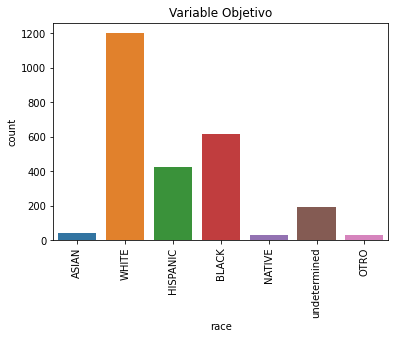

In [2001]:
# Todas las Razas conteo
sns.countplot(data=policia_asesinatos, x='race')
plt.xticks(rotation=90)
plt.title('Variable Objetivo')
plt.show()

In [ ]:
# Como hay 3 razas que tienen más ejemplos vamos a sintetizar
def top_four(race):
    if race == 'WHITE':
      return 'WHITE'
    elif race == 'BLACK':
      return 'BLACK'
    if race == 'HISPANIC':
      return 'HISPANIC'
    else: 
      return 'OTHER'

### **MODELOS PREDICTIVOS SUPERVISADOS**

**Modelo 1**: Univariative

Como la variable Edad tiene una gran correlación con la variable de la raza, vamos a realiazar un modelo de una sola variable predictora para ver como trabaja.

In [1955]:
def random_forest_univariative(datos):
    # Datos
    univariative = datos[['age','race']]
    # Vamos a filtar las edades entre 20 y 60 ya que el histograma que hicimos arriba demuestra que la mayor distribución de ejemplos esta entre esas edades
    univariative[(univariative.age >= 20) & (univariative.age <= 60)]

    #Separating Variables
    X = univariative.drop(columns=['race'])
    y = univariative['race']

    #Train and Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=0)

    print('RANDOM FOREST')
    print('X entrenamiento:', X_train.shape)
    print('X Prueba:', X_test.shape)
    print('Y entrenamiento:', y_train.shape)
    print('Y prueba:' ,y_test.shape)

    ## ALGORITMO DE RANDOM FOREST
    #RANDOM FOREST MODEL
    print('')
    random_classifier = RandomForestClassifier(n_estimators=10, random_state=0)
    random_classifier.fit(X_train, y_train)
    random_prediction = random_classifier.predict(X_test)
    #Model Accuracy
    print('RANDOM FOREST CLASSIFIER')
    print(confusion_matrix(y_test, random_prediction))
    print(classification_report(y_test, random_prediction))
    print('Model Accuracy: ',accuracy_score(y_test, random_prediction)*100)

random_forest_univariative(datos)



RANDOM FOREST
X entrenamiento: (2281, 1)
X Prueba: (254, 1)
Y entrenamiento: (2281,)
Y prueba: (254,)

RANDOM FOREST CLASSIFIER
[[ 0  1  0  0  0  2  0]
 [ 0 16  0  0  0 51  1]
 [ 0 11  0  0  0 32  2]
 [ 0  1  0  0  0  2  0]
 [ 0  2  0  0  0  1  0]
 [ 0 14  1  0  0 95  1]
 [ 0  3  0  0  0 13  5]]
              precision    recall  f1-score   support

       ASIAN       0.00      0.00      0.00         3
       BLACK       0.33      0.24      0.28        68
    HISPANIC       0.00      0.00      0.00        45
      NATIVE       0.00      0.00      0.00         3
        OTRO       0.00      0.00      0.00         3
       WHITE       0.48      0.86      0.62       111
undetermined       0.56      0.24      0.33        21

    accuracy                           0.46       254
   macro avg       0.20      0.19      0.18       254
weighted avg       0.35      0.46      0.37       254

Model Accuracy:  45.66929133858268


##**Modelo Multivariative**

Modelo con varias variables predictoras

In [1957]:
# Segun el classificador de arbol de decision extra estas son las variables sociodemograficas  y de manera de morir más relevantes
datos_modelo = datos[['age','state_CA','armed_gun','race']]

In [1996]:
def random_forest_multivariative(datos):
    datos = datos[(datos.race != 'ASIAN') & (datos.race != 'undetermined')]
    #Separating Variables
    X = datos.drop(columns=['race'])
    y = datos['race']
    #Train and Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=0)
    print('')
    print('X entrenamiento:', X_train.shape)
    print('X Prueba:', X_test.shape)
    print('Y entrenamiento:', y_train.shape)
    print('Y prueba:' ,y_test.shape)
    ## ALGORITMO DE RANDOM FOREST
    #RANDOM FOREST MODEL
    random_classifier = RandomForestClassifier(n_estimators=4, random_state=0)
    random_classifier.fit(X_train, y_train)
    random_prediction = random_classifier.predict(X_test)
    #Model Accuracy
    print('RANDOM FOREST CLASSIFIER')
    print(confusion_matrix(y_test, random_prediction))
    print(classification_report(y_test, random_prediction))
    print('Model Accuracy: ',accuracy_score(y_test, random_prediction)*100)

# Llamando al modelo
random_forest_multivariative(datos=datos_modelo)


X entrenamiento: (2070, 3)
X Prueba: (231, 3)
Y entrenamiento: (2070,)
Y prueba: (231,)
RANDOM FOREST CLASSIFIER
[[22  3  0  0 38]
 [ 9 15  0  0 21]
 [ 1  0  0  0  2]
 [ 2  0  0  0  1]
 [18  9  0  0 90]]
              precision    recall  f1-score   support

       BLACK       0.42      0.35      0.38        63
    HISPANIC       0.56      0.33      0.42        45
      NATIVE       0.00      0.00      0.00         3
        OTRO       0.00      0.00      0.00         3
       WHITE       0.59      0.77      0.67       117

    accuracy                           0.55       231
   macro avg       0.31      0.29      0.29       231
weighted avg       0.52      0.55      0.52       231

Model Accuracy:  54.97835497835498


## **K-Nearest Neighbor**

In [1995]:
def knn_multivariative(datos):
    datos = datos[(datos.race != 'ASIAN') & (datos.race != 'undetermined')] 
#Separating Variables
    X = datos.drop(columns=['race'])
    y = datos['race']
    #Train and Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=0)
    print('')
    print('X entrenamiento:', X_train.shape)
    print('X Prueba:', X_test.shape)
    print('Y entrenamiento:', y_train.shape)
    print('Y prueba:' ,y_test.shape)
    #KNN Classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=50)
    knn_classifier.fit(X_train, y_train)
    clf_prediction = knn_classifier.predict(X_test)
    #Model Accuracy
    print('KNN Model')
    print(confusion_matrix(y_test, clf_prediction))
    print(classification_report(y_test, clf_prediction))
    print('Model Accuracy: ',accuracy_score(y_test, clf_prediction)*100)

# Llamando al modelo
knn_multivariative(datos=datos_modelo)


X entrenamiento: (2070, 3)
X Prueba: (231, 3)
Y entrenamiento: (2070,)
Y prueba: (231,)
KNN Model
[[ 21   1   0   0  41]
 [ 10   3   0   0  32]
 [  0   0   0   0   3]
 [  1   0   0   0   2]
 [ 12   1   0   0 104]]
              precision    recall  f1-score   support

       BLACK       0.48      0.33      0.39        63
    HISPANIC       0.60      0.07      0.12        45
      NATIVE       0.00      0.00      0.00         3
        OTRO       0.00      0.00      0.00         3
       WHITE       0.57      0.89      0.70       117

    accuracy                           0.55       231
   macro avg       0.33      0.26      0.24       231
weighted avg       0.54      0.55      0.48       231

Model Accuracy:  55.41125541125541


Como era de esperarse, debido a que la variable objetivo raza "white" contiene un nùmero mayor de ejemplos, nuestros algoritmos son mejores para determinar esta raza en primer lugar, por lo que de manera general debemos **Traer más data** para entrenar el algoritmo con más ejemplos de las otras razas.

El Algorimto Random forest es mejor para clasificar en general, por lo que seguiremos utilizando este.

Para ver como funcionarría en un caso hipotetico en donde existiese más data existen varias formas de realizarlo como:

**-Undersampling**

**-OverSmapling**

En mi caso particular siempre me gusta utilizar más data por lo que usaremos la técnica de oversampling para simular más data a la variable objetivo.

#### **Random Forest OverSamplig**

In [2005]:
def random_forest_multivariative_over(datos):

    # VAMOS A ELIMINAR LA CLASE ASIATICA E INDETERMINADA YA QUE COMO TIENEN TAN POCOS EJEMPLOS O NO APORTAN NADA EN CASO DE "indeterminad" no podemos saber la raza
    datos = datos[(datos.race != 'ASIAN') & (datos.race != 'undetermined')]
    #Let´s oversample the target class
    X = datos.drop(columns=['race'])
    y = datos['race']
    smote = SMOTE('minority')
    X_smote, y_smote = smote.fit_resample(X,y)

    #Train and Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.10,random_state=42)
    print('X entrenamiento:', X_train.shape)
    print('X Prueba:', X_test.shape)
    print('Y entrenamiento:', y_train.shape)
    print('Y prueba:' ,y_test.shape)
    print('')
    #RANDOM FOREST MODEL con oversamplig
    random_classifier = RandomForestClassifier(n_estimators=4, random_state=0, verbose=2)
    random_classifier.fit(X_train, y_train)
    random_prediction = random_classifier.predict(X_test)
    #Model Accuracy
    print('RANDOM FOREST CLASSIFIER')
    print(confusion_matrix(y_test, random_prediction))
    print(classification_report(y_test, random_prediction))
    print('Model Accuracy: ',accuracy_score(y_test, random_prediction))
#algoritmo
random_forest_multivariative_over(datos=datos_modelo)

X entrenamiento: (3126, 3)
X Prueba: (348, 3)
Y entrenamiento: (3126,)
Y prueba: (348,)

building tree 1 of 4
building tree 2 of 4
building tree 3 of 4
building tree 4 of 4
RANDOM FOREST CLASSIFIER
[[ 21   3   5   0  31]
 [  9  12   1   0  18]
 [  0   1 105   0   9]
 [  0   0   0   0   2]
 [  9  10   6   0 106]]
              precision    recall  f1-score   support

       BLACK       0.54      0.35      0.42        60
    HISPANIC       0.46      0.30      0.36        40
      NATIVE       0.90      0.91      0.91       115
        OTRO       0.00      0.00      0.00         2
       WHITE       0.64      0.81      0.71       131

    accuracy                           0.70       348
   macro avg       0.51      0.47      0.48       348
weighted avg       0.68      0.70      0.68       348

Model Accuracy:  0.7011494252873564


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


In [2010]:
# Random forest con la variante de clases Top Four
def random_forest_multivariative_over_top_four(datos):
    datos['race'] = datos['race'].apply(top_four)    
    #Let´s oversample the target class
    X = datos.drop(columns=['race'])
    y = datos['race']
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X,y)

    #Train and Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.10,random_state=42)
    print('X entrenamiento:', X_train.shape)
    print('X Prueba:', X_test.shape)
    print('Y entrenamiento:', y_train.shape)
    print('Y prueba:' ,y_test.shape)
    print('')
    #RANDOM FOREST MODEL con oversamplig
    random_classifier = RandomForestClassifier(n_estimators=4, random_state=0, verbose=2)
    random_classifier.fit(X_train, y_train)
    random_prediction = random_classifier.predict(X_test)
    #Model Accuracy
    print('RANDOM FOREST CLASSIFIER')
    print(confusion_matrix(y_test, random_prediction))
    print(classification_report(y_test, random_prediction))
    print('Model Accuracy: ',accuracy_score(y_test, random_prediction))
#algoritmo
random_forest_multivariative_over(datos=datos_modelo)

X entrenamiento: (3126, 3)
X Prueba: (348, 3)
Y entrenamiento: (3126,)
Y prueba: (348,)

building tree 1 of 4
building tree 2 of 4
building tree 3 of 4
building tree 4 of 4
RANDOM FOREST CLASSIFIER
[[ 22   3   4   0  31]
 [  9  12   1   0  18]
 [  4   1 105   0   5]
 [  0   0   0   0   2]
 [ 10  10   5   0 106]]
              precision    recall  f1-score   support

       BLACK       0.49      0.37      0.42        60
    HISPANIC       0.46      0.30      0.36        40
      NATIVE       0.91      0.91      0.91       115
        OTRO       0.00      0.00      0.00         2
       WHITE       0.65      0.81      0.72       131

    accuracy                           0.70       348
   macro avg       0.50      0.48      0.48       348
weighted avg       0.69      0.70      0.69       348

Model Accuracy:  0.7040229885057471


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


Podemos ver que el modelo mejoro hasta un **70%**
En este caso las clases "asian", "otro" y "undetermined" se unieron, ya que contienen muy poca data, por lo que podrían unirse y definirse como **"OTRO"**

Diferente de 
1. BLACK
2. HISPANIC
3. NATIVE
4. WHITE

En la industria un modelo entre el 70%-90% de accuracy es considerado bastante bueno y **realista**

Sin embargo este modelo se podría mejorar con mayor data de entrenamiento, algunos ajustes a los hiperparametros pero para efectos practicos puede predecir bastante bien las clases excepto la clase "OTRO"

Vamos a enfocarnos en la **métrica de F1 score** ya que combina precision y recall y es la métrica más completa

Se utilizarón las 3 variables que tenian mayor correlación con la variable objetivo, ya que las demas variables no aportaban mucho al modelo, e incluso causaban el effecto de underfitting de data "basura"